In [ ]:
(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. We will also analyze the creation dates of questions.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/datascience16/lectures/blob/master/Lecture2/Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve the questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [2]:
import requests

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

#we will later use page number to get more results for has_more = true. here, hardcoded to 1
i=1
response = requests.get("https://api.stackexchange.com/2.2/questions?page="+str(i)+"&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print response

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [3]:
print response.text

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":157,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":199,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":223,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [4]:
import json

print json.dumps(response.json(), indent=2)

{
  "has_more": true, 
  "items": [
    {
      "is_answered": true, 
      "view_count": 199, 
      "tags": [
        "php", 
        "mysql", 
        "arrays", 
        "mysqli"
      ], 
      "last_activity_date": 1420071815, 
      "answer_count": 2, 
      "creation_date": 1420070458, 
      "score": 0, 
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array", 
      "accepted_answer_id": 27727478, 
      "owner": {
        "user_id": 3210431, 
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1", 
        "user_type": "registered", 
        "reputation": 157, 
        "link": "http://stackoverflow.com/users/3210431/salep", 
        "accept_rate": 78, 
        "display_name": "salep"
      }, 
      "title": "Inserting multiple records into MySQL from an array", 
      "question_id": 27727385
    }, 
    {
      "is_answered": false, 
      "view_count": 223, 
      "tags": [
        "apache-pig"
      

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [14]:
import time
import datetime

def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    stack_dir = response.json() 
    """
    stack_dir is a directory with json fields as keys
    """
    for x in stack_dir["items"]:
        """ 
        access creation_date key,value in the directory
        """
        print time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x["creation_date"])),",",

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [15]:
import json
import time

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00
more_pages = True

#add page number to url to get all pages until has_more = true in the response
i = 1

while more_pages:
    
    response = requests.get("https://api.stackexchange.com/2.2/questions?page="+str(i)+"&pagesize=100" +
                            "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                            "&order=asc&sort=creation&site=stackoverflow")
    print "\npage",i,response,":",
    more_pages = response.json()["has_more"]
   
    print more_pages,
    i += 1
    print_creation_dates_json(response)

print response.json()["has_more"]


page 1 <Response [200]> : True 2014-12-31 19:00:58 , 2014-12-31 19:01:43 , 2014-12-31 19:02:32 , 2014-12-31 19:02:57 , 2014-12-31 19:03:31 , 2014-12-31 19:04:01 , 2014-12-31 19:05:03 , 2014-12-31 19:05:27 , 2014-12-31 19:05:34 , 2014-12-31 19:06:17 , 2014-12-31 19:06:41 , 2014-12-31 19:07:28 , 2014-12-31 19:07:39 , 2014-12-31 19:07:46 , 2014-12-31 19:09:28 , 2014-12-31 19:10:05 , 2014-12-31 19:10:29 , 2014-12-31 19:11:43 , 2014-12-31 19:12:02 , 2014-12-31 19:12:55 , 2014-12-31 19:13:04 , 2014-12-31 19:13:32 , 2014-12-31 19:13:50 , 2014-12-31 19:15:40 , 2014-12-31 19:17:11 , 2014-12-31 19:18:50 , 2014-12-31 19:22:16 , 2014-12-31 19:23:14 , 2014-12-31 19:23:50 , 2014-12-31 19:24:28 , 2014-12-31 19:25:07 , 2014-12-31 19:25:29 , 2014-12-31 19:25:39 , 2014-12-31 19:26:42 , 2014-12-31 19:27:01 , 2014-12-31 19:27:54 , 2014-12-31 19:28:49 , 2014-12-31 19:30:43 , 2014-12-31 19:32:22 , 2014-12-31 19:32:34 , 2014-12-31 19:33:17 , 2014-12-31 19:33:50 , 2014-12-31 19:34:15 , 2014-12-31 19:34:41 , 

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/kzhao/teaching/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that this file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may also want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on this file, you will get a `MemoryError`.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 3 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv` using `to_csv()`. **(10 pts)**

In [16]:
import time, sys
from sklearn.feature_extraction import DictVectorizer
import xml.etree.ElementTree as ET
import pandas as pd

"""
We have two ways to parse the entire data:
1. iterparse()
2. Read the file line by line and parsestring()
I compared the two approaches in following code and preferred the second method which is faster and simpler (looks like iterparse uses similar approach).
The first way has been commented out (for future reference) as function parseStackIter()

Files generated:
question_dataframe.csv
answer_dataframe.csv - parse answer posts in the same iteration, because effective time is lower than doing it separately

Runtime less than 30 min 
"""

"""
#parseStackIter() left for future reference. PLEASE SEE NEXT def fastParser()
def parseStackIter(file_path): 
    #testing timestamps
    startTime = time.time()
    
    context = ET.iterparse(file_path, events=("start", "end"))
    context = iter(context)   
    event, root = context.next()
    
    #print index to csv only once
    csvIndex = True
    df = pd.DataFrame() 
    i=0
    answerFlag = False
    for event, elem in context:
        rows=[]
        #for start event for <row>        
        if event == 'start' and elem.tag == 'row':                       
            owner = "OwnerUserId"
            #for all question posts
            if elem.attrib['PostTypeId'] == '1':
                #print event, elem.tag, elem.attrib['PostTypeId']
                
                if all(k in elem.attrib for k in ("Id","CreationDate","OwnerUserId","Tags"))==False:                    
                    if i%50 == 0:
                        sys.stdout.write("!")
                    i += 1
                    #for missing entries, we can either skip or take DisplayName                   
                    #continue     
                    owner = "OwnerDisplayName"
                else:
                    allTags = elem.attrib["Tags"]
                    #extract first tag
                    firstTag = elem.attrib["Tags"].split("<")[1].split(">")[0].strip()
                    
                    #print elem.attrib["Id"]
                    
                    #extract relevant columns
                    #sr = pd.Series(elem.attrib, index=["CreationDate",owner,"Tags","Id"])
                    #replace tags with first tag
                    #sr.replace(to_replace=allTags, value=firstTag, inplace=True)
                    #append to dataframe - which will be written to csv at the end
                    #df = df.append(sr, ignore_index=True)
                    rows.append([elem.get("Id"), elem.get(owner), elem.get("CreationDate"), elem.get("Tags").split("<")[1].split(">")[0].strip()])
                    df = df.append(rows, ignore_index=True)
                    del rows
                    df.to_csv("question_dataframe.csv", mode='a', header=csvIndex, Index=False, index_label=False, sep="\t", encoding='utf-8')
                    del df
                    answerFlag = False                  
            #next elif block is part of parsing needed in step 3
            elif elem.attrib['PostTypeId'] == '2':
                if all(k in elem.attrib for k in ("ParentId","OwnerUserId")):
                    #sr = pd.Series(elem.attrib, index=["OwnerUserId","ParentId"])
                    rows.append([elem.get("Id"), elem.get("OwnerUserId")])
                else:
                    sys.stdout.write(".")
                    #sr = pd.Series(elem.attrib, index=["OwnerDisplayName","ParentId"])
                    rows.append([elem.get("Id"), elem.get("OwnerDisplayName")])
                #df = df.append(sr, ignore_index=True)
                df = df.append(rows, ignore_index=True)
                
                answerFlag = True
                
        elif event == 'end':
            #clear memory when </row>
            if elem.tag == 'row':
                if answerFlag:
                    df.to_csv("answer_dataframe.csv", mode='a', header=csvIndex, Index=False, index_label=False, sep="\t", encoding='utf-8')
                else:
                    df.to_csv("question_dataframe.csv", mode='a', header=csvIndex, Index=False, index_label=False, sep="\t", encoding='utf-8')
                if csvIndex:
                    csvIndex = False
                    print "Done with first elem reset "
                #elem.clear()
                
                #root.clear()
                del df
                #sys.stdout.write(".")
                df = pd.DataFrame() 
        root.clear()
        elem.clear()

    #dump all extracted data to csv and print time taken
    #df.to_csv("question_dataframe.csv", mode='a', sep="\t", encoding='utf-8')
    print "DONE PARSING", (time.time() - startTime), "sec"
"""

def process_buffer(buf):
    elem = ET.fromstring(buf)
    #pull it apart 
    owner = "OwnerUserId"   
    ownerid = ""
    df = pd.DataFrame()
    
    """
    It saves time to parse questions and answers in the same iteration
    Look for PostTypeId and decide which fields to save to list
    """    
    if elem.attrib['PostTypeId'] == '2':
        if all(k in elem.attrib for k in ("OwnerUserId","ParentId"))==False:    
            #if this post doesn't have OwnerUserId, then use OwnerDisplayName
            ownerid = elem.get("OwnerDisplayName")
        else:
            ownerid = elem.get("OwnerUserId")
        if ownerid=="":
            print "[NEVER HAPPENS]:empty owner", ownerid, elem.get("Id")
            return 
        answerRows.append([ownerid, elem.get("ParentId")])    
    elif elem.attrib['PostTypeId'] == '1':
        if all(k in elem.attrib for k in ("OwnerUserId","Id"))==False:                        
            #if this post doesn't have OwnerUserId, then use OwnerDisplayName
            ownerid = elem.get("OwnerDisplayName")
        else:
            ownerid = elem.get("OwnerUserId")
        if ownerid == "":
            print "[NEVER HAPPENS]:empty owner", ownerid
            return
        questionRows.append([elem.get("Id"), ownerid, elem.get("CreationDate"), elem.get("Tags").split("<")[1].split(">")[0].strip()])
def fastParser():
    """
    The function takes advantage of xml strucure which is <row Id.... />
    Reading a single line doesn't need much memory and that line is discarded before starting the next line
    """
    
    path = '/home/sahil/acads/591-datamining/stackoverflow-posts-2015.xml'
    
    #for reference to smaller datasets - DO NOT REMOVE
    #path = '/home/sahil/acads/591-datamining/subsubset_stackoverflow.xml' 
    #path = '/home/sahil/acads/591-datamining/evenlargersubset_stackoverflow.xml'
    
    startTime = time.time()
    with open(path,'rb') as inputfile:
        progress = 0
        print path
        for line in inputfile:
            #print line
            if progress % 5000==0: #cheap progress bar - takes around 28 min
                sys.stdout.write("!")
                sys.stdout.flush()
                #print progress
            progress+=1

            if "<row" in line:
                #process buffer does the job of extracting fields and adding to lists
                process_buffer(line)
                inputbuffer = None
                #print "clear"                

    df = pd.DataFrame()
    df = df.append(answerRows, ignore_index=True)
    df.to_csv("answer_dataframe.csv", mode='a', header=False, Index=False, index_label=False, sep="\t", encoding='utf-8')
    del df
    df = pd.DataFrame()
    df = df.append(questionRows, ignore_index=True)
    df.to_csv("question_dataframe.csv", mode='a', header=False, Index=False, index_label=False, sep="\t", encoding='utf-8')
    print "DONE PARSING", (time.time() - startTime), "sec", progress, "lines"  
   

questionRows = []
answerRows=[]
fastParser()
#take care of global variables hogging memory - context is saved
del questionRows
del answerRows


/home/sahil/acads/591-datamining/stackoverflow-posts-2015.xml
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [7]:
import pandas

question_df = pandas.read_csv('question_dataframe.csv', sep='\t')
print(question_df)

               0  27727385     3210431  2015-01-01T00:00:58.253  \
0              1  27727388      868779  2015-01-01T00:01:43.673   
1              2  27727391     4372672  2015-01-01T00:02:32.123   
2              3  27727393     2482149  2015-01-01T00:02:57.983   
3              4  27727394     4263870  2015-01-01T00:03:31.337   
4              5  27727396     4409381  2015-01-01T00:04:01.407   
5              6  27727406      875317  2015-01-01T00:05:03.773   
6              7  27727407      821742  2015-01-01T00:05:27.167   
7              8  27727408     2595033  2015-01-01T00:05:34.733   
8              9  27727409     1815395  2015-01-01T00:06:17.720   
9             10  27727410      541091  2015-01-01T00:06:41.067   
10            11  27727414     1210038  2015-01-01T00:07:28.747   
11            12  27727418     3674356  2015-01-01T00:07:39.243   
12            13  27727419      347062  2015-01-01T00:07:46.460   
13            14  27727424     1254618  2015-01-01T00:09:28.24

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 1000 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize the questions by looking at the first tag in each question. You may choose to implement any one of the similarity/distance measures we discussed in class. Document your findings. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction module](http://scikit-learn.org/stable/modules/feature_extraction.html) helpful.

In [9]:
"""
the problem can be divided in following steps,
    From step 2, we have two csv files: quesion_dataframe.csv and answer_dataframe.csv,
    with fields{question id, creation date, ownerid, first tag} and
    {ownerid, question id} respectively.    
Using this information,
    1. Track this tuple from answer posts- {userID, numberOfAnswers, QuestionsAsnwered}.             
    2. Take top 1000 users based on the occurrences 
            and populate per user list of first tag from question posts file in step 2
    3. Use a distance function on the TagList[] vector of size 1000
        using pair wise jaccard distance matrix to calculate distance of these `vectors' from step 2
    
    (first try for small data - say top 10)
File(s) generated:
list.txt - to get an idea of similarity matrix, print top users, etc.


"""
import time, sys
from sklearn.feature_extraction import DictVectorizer
import xml.etree.ElementTree as ET
import pandas as pd
from collections import defaultdict 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
import csv
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import operator

listUsers=defaultdict(list)
"""
#PLEASE SEE NEXT FUNCTION.
#behaves poorly due to nested loops but kept for future references. 
def populateTagsSloow():    
    print "Populate tags from question.csv and answers.csv"
    topUsers = defaultdict(list)
    qtag = ""
    taglist = []
    with open("question_dataframe.csv.med",'rb') as inputfile:
        for questions in inputfile:
            qid = questions.split("\t")[1]
            tag = questions.split("\t")[4]
            
            for answers in open("answer_dataframe.csv.med"):
                if qid in answers:
                    #print qid, answers.split("\t")[1], tag
                    ansOwner = answers.split("\t")[1]
                    listUsers[ansOwner].append(tag.split("\n")[0])
    
    f = open("list.txt",'w')
    for k in sorted(listUsers, key=lambda k: len(listUsers[k]), reverse=True)[:50]:
    #for k,v in listUsers.iteritems():
        f.write("%d\t %s\t" % (len(listUsers[k]),k))
        for i in range(0,len(listUsers[k])):
            f.write("%s," % listUsers[k][i])
            topUsers[k].append(listUsers[k][i])
            qtag += listUsers[k][i]+' '
        taglist.append(qtag)
        qtag = ""
        f.write("\n")
    #print taglist
    #print topUsers.items()
    
    print "Done populating", len(taglist), time.time()-starttime
    f.close()                           
    
    vectorizer = CountVectorizer(min_df=1)

    tagvec =vectorizer.fit_transform(taglist)
"""
#Executable code beginning
"""
Generate a counter vector based on tags corresponding to each user.
Then use this 1000*m matrix where m is total number of tags seen.

Use this counter vector to generate jaccardian distance matrix of 1000*1000 dimention,
where distance[i][j] = distance[j][i] = pairwise distance between users i and j.

Then find top 100 distinct jaccardian scores and store corresponding indexes i1,i2,...i100.
Manually fill a 100*100 matrix such that top[i][j]=top[j][i]=distance[i][j] is in top 100 distinct distances.

Return this 100*100 distance matrix.
"""
def getDistanceMatrix(taglist, topHundred, topUsers):
    #count vector instance to generate a per user vector
    vectorizer = CountVectorizer(min_df=1)
    tagvec = vectorizer.fit_transform(taglist)
    
    #pairwise distance vector of 1000*1000 dimention
    jacc_dists = 100*metrics.pairwise_distances(tagvec.toarray(),Y=None,metric='jaccard', n_jobs=1)

    #start looking for top 100 distinct users based on distance values.
    #if same user has maximum values 1.0 and 1.0, consider only once and look for next user
    
    #topHundred{[]} is dict of list to store user, similarity, user to which similarity is maximum
    #this helps compute the symmetric matrix later
    for i in xrange(0,len(topUsers)-1):  
        uid = list(topUsers)[i]
        
        for j in xrange (0,len(jacc_dists[i]) - 1):            
            if i not in topHundred.keys():
                topHundred[i] = []          
                topHundred[i].append([j,jacc_dists[i][j]])
                #print "DEBUG:", topHundred, topHundred[i][0]
            elif topHundred[i][0][1] < jacc_dists[i][j]:      
                #IMP: only update current user. do not add new entry for already present user!
                topHundred[i] = []
                topHundred[i].append([j,jacc_dists[i][j]])

    #sort and get top 100 users
    top = sorted(topHundred.items(), key=operator.itemgetter(1))[:100]
    #print top
    
    #manually fill in 100*100 distances
    w, h = 100, 100
    plotarray = [[0] * w for i in range(h)]
    
    i = 0
    for k,v in top:
        #print k,v        
        j = 0
        for col,dist in top:
            #print col,
            plotarray[i][j] = jacc_dists[k][col] 
            j += 1
        i += 1
    #print len(plotarray)
    
    return plotarray

"""
Populate users and find top 1000 users based on number of answers.
Then generate a list of per user tags for the questions they answered.
Feed this list of tags to vector generator which calculates distances.

Returns 100*100 distance matrix.
"""
#csv.reader() looked a bit faster than pandas_read_csv() [couldn't find any suitable explanation for the difference]
def populateTags(topHundred):
    topUsers = defaultdict(list)
    qtag = ""
    taglist = []
    questionDict = defaultdict(list)
    
    with open("question_dataframe.csv", "rb") as csvfile:
        datareader = csv.reader(csvfile)
        count = 0
        for row in datareader:
            qid = row[0].split("\t")[1]
            tag = row[0].split("\t")[4]
            questionDict[qid].append(tag)
            
        
    with open("answer_dataframe.csv", "rb") as ansfile:
        ansreader = csv.reader(ansfile)
        for ansrow in ansreader:
            qid = ansrow[0].split("\t")[2]
            ansOwner = ansrow[0].split("\t")[1]
            for alltags in questionDict[qid]:
                #print alltags,
                if alltags not in listUsers[ansOwner]:
                    listUsers[ansOwner].append(alltags)
    #print "[DEBUG]:",questionDict
    #print "[DEBUG]:", listUsers                           
    
    #this intermediate file is used for debugging (helps manually verify similar users later)
    f = open("list.txt",'w')
    
    #take top 1000 users based on counts i.e. len(listUsers[uid])
    for k in sorted(listUsers, key=lambda k: len(listUsers[k]), reverse=True)[:1000]:
    #for k,v in listUsers.iteritems():
        f.write("%d\t %s\t" % (len(listUsers[k]),k))
        for i in range(0,len(listUsers[k])):
            f.write("%s," % listUsers[k][i])
            topUsers[k].append(listUsers[k][i])
            #take all the tags corresponding to this user
            qtag += listUsers[k][i]+' '
            
        #taglist keeps track of list of tags which will be used later for formulating vector
        taglist.append(qtag)
        qtag = ""
        f.write("\n")
    #print taglist
    #print topUsers.items()
    
    print "Done populating", len(taglist)
    f.close()                           

    #free up some memory 
    del questionDict
    
    #now find distances and return top 100 users. 
    #Top 100 users are chosen based on the similarity score. Please see getDistanceMatrix() description
    
    return getDistanceMatrix(taglist, topHundred, topUsers)
    
"""
Driver function to populate tags, generate vectors and calculate distances.
Returns 100*100 matrix of top 100 users. Please see comments getDistanceMatrix() for details.
"""
def getPlot():    
    start = time.time()    
    print "started"
    sys.stdout.flush()
    
    topHundred = defaultdict(list)
    ret = populateTags(topHundred)
    
    print "Done with top 100 similar. Returning distances", time.time()-start, "sec"
    return ret

#in place testing
plottop = getPlot()


started
Done populating 1000
Done with top 100 similar. Returning distances 31.6005718708 sec


Plot the top 100 most similar users. See [Lecture 3](https://github.com/datascience16/lectures/blob/master/Lecture3/Distance-Functions.ipynb) for examples. **(10 pts)**

Plotting (100, 100)


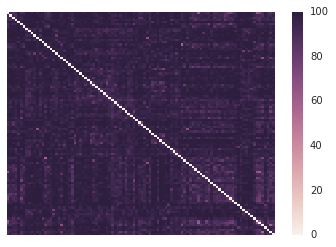

In [10]:
import seaborn as sns
import sklearn as sk
import numpy as np

%matplotlib inline


#plottop = getPlot()

#we need np array to pass shape 
jacc_dist = np.array(plottop)

#shuffle randomly. not really required
shuffled_data, row_idx = sk.utils.shuffle(jacc_dist, np.arange(jacc_dist.shape[0]), random_state=100)
#taking subset of 100*100 was slightly ambiguous. Another way is to simply take a 100*100 cut
#instead, I calculate the top 100 distinct scores based on the scores and shuffle data for better plot
#more details in getDistanceMatrix()
y = [ row_idx.tolist().index(i) for i in range(len(row_idx))][:100]

rearranged_dists = jacc_dist[y,:][:,y]

print "Plotting", rearranged_dists.shape

#plot 100*100 users
sns.heatmap(plottop, xticklabels=False, yticklabels=False, linewidths=0)


#print topHundred.sort()[:100]
#sns.heatmap(jacc_dist, xticklabels=False, yticklabels=False, linewidths=0)

In [ ]:
#redundant cell

Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the `CreationDate` of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. **(30 pts)**

You may find the [pandas.DataFrame.resample module](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) helpful.

In [8]:
import csv     
from collections import defaultdict 
import time,sys
import datetime

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
Steps:
1. Access question_dataframe.csv to get users and questions mapping (along with their creation dates and tag)
2. Sort users based on number of questions and take top 100 such users
3. Generate a time series based on {<userid, tag> = creation_date} where creation_date is in epoch seconds
4. Use either editdistance (possible to use on date timestamp) or DTW (for the integer value, preferred) 
5. Track top 2 and least 2 matching series at runtime and return tuple [<slow series pair>, <fast series pair>]

(6. Plot it in next step)

Returns 4 series with 1st two as least similar in first two followed by two least similar.
"""

#we have two types of distances, from resources in lecture slides the implementations are similar to this:
def editdistance(a,b): #not used for now
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n

    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]
def DTWDistance(s1, s2):
    DTW={}
    w = abs(len(s1)-len(s2))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
   
    DTW[(-1, -1)] = 0
    for i in range(len(s1)):        
        for j in range(max(0, i-w), min(len(s2), i+w)):
            #print s1[i],s2[j]
            dist= (int(s1[i]) - int(s2[j]))**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])
"""
Driver function to populate questions and users to get top 100 users.
Using the tags of questions of these users, we create a timeseries with key = "uid"+"tag".
Then run pairwise similarity function on all these lists
"""

def seriesDistance():    
    starttime = time.time()
    questionDict = defaultdict(list)
    timeseries = defaultdict(list)
    with open("question_dataframe.csv", "rb") as qfile:
        qreader = csv.reader(qfile)
        for qrow in qreader:
            #print qrow

            uid = qrow[0].split("\t")[2]
            qdate = qrow[0].split("\t")[3].split(":")[0]
            tag = qrow[0].split("\t")[4]
            #if uid not in questionDict.keys():
                #questionDict[uid] = []
            #print len(questionDict[uid]),
            questionDict[uid].append([qdate,tag])
    print "Users created", time.time()-starttime
    del qreader
    del qrow
    
    hundredQuid = defaultdict(list)
    hundredQuid = sorted(questionDict, key=lambda k: len(questionDict[k]), reverse=True)[:100]
    #print hundredQuid
    
    pattern = '%Y-%m-%dT%H'
    
    for uid in hundredQuid:
        entries = questionDict[uid]
        #print uid, len(entries)
        
        for qtags in xrange (0,len(entries)):
            
            #ignore small time series to get interesting plots
            if len(entries) < 15:
                continue
            seriesid = uid+entries[qtags][1]                
            epoch = int(time.mktime(time.strptime(entries[qtags][0], pattern)))
            timeseries[seriesid].append(epoch)
        
        #debug
        """if len(timeseries[seriesid]) < 3:
            print "DEBUG:", seriesid, ":", timeseries[seriesid]
            sys.stdout.flush()"""
    
    print len(timeseries), "timeseries created", time.time()-starttime,"\nDistance pairwise"
    sys.stdout.flush()

    """
    Note: I have put an external restriction on timeseries based on the lengths for getting
    meaningful graphs. More details below,
    
    While formulating time series, I decided to ignore smaller series. There are some users which 
    have almost 250 question posts but have some rare tag among all other tags.
    For such users, the timeseries is short due to which it becomes similar to other timeseries which contains that timestamp.
    As we can see below, the similar timeseries are the shorter ones.
    """
    ret1 = []
    ret2 = []
    ret3 = []
    ret4 = []
    #start with random values, eventually series converge to max and min
    maxdist = 100
    mindist = 9000000.0
    for k1 in timeseries:
        x = timeseries[k1]
        if len(x)<5:
            #ignore smaller series for better plot
            continue
        for k2 in timeseries:
            if k1!=k2:        
                y = timeseries[k2]
                #ignore dissimilar series for better plot
                if max(len(x),len(y)) - min(len(x),len(y)) > 50 or len(y)<5:
                    continue
                #dist = editdistance(x, y)
                dist = DTWDistance(x,y)
                #print dist,
                if dist > maxdist:
                    
                    """#ignore dissimilar series for better plot
                    if max(len(x),len(y)) - min(len(x),len(y)) > 50:
                        continue"""
                    ret1 = x
                    ret2 = y
                    #print "DEBUG1:", len(x), len(y)
                    maxdist = dist
                if dist < mindist:
                    ret3 = x
                    ret4 = y
                    #print "DEBUG2:", len(x), len(y)
                    mindist = dist
                    
    print "\n finished distances", time.time()-starttime
    print len(ret1), len(ret2), len(ret3), len(ret4)
    """pattern = '%Y-%m-%dT%H'
    for i in xrange(0,len(ret1)):        
        epoch = int(time.mktime(time.strptime(ret1[i], pattern)))
        ret1[i] = epoch
        
    for i in xrange(0,len(ret2)):        
        epoch = int(time.mktime(time.strptime(ret2[i], pattern)))
        ret2[i] = epoch
    """
    #print ret1,ret2
    return [ret1,ret2,ret3,ret4]

p = seriesDistance()
"""
print p[0],p[1]
print p[2], p[3]

plt.plot(p[0], 'r--')
plt.plot(p[1], 'b--')
plt.plot(p[2], 'g^')
plt.plot(p[3], 'y^')"""
print "finished" #Following plot shows only a subset of series plotted. Please see next code segment for all 100 series

Users created 10.1478209496
2422 timeseries created 11.1446268559 
Distance pairwise

 finished distances 131.926519871
18 20 10 8
finished


Plot the 2 most similar and the 2 most different time series. **(10 pts)**

18 : 20
10 | 8
finished


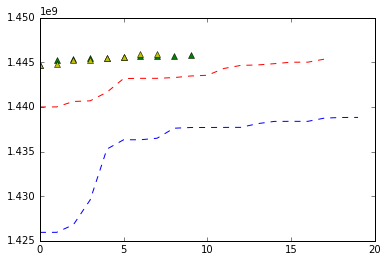

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
The results are based on the distance of two time series.

Plots explained:

"""

#p = seriesDistance()

print len(p[0]),":",len(p[1]) #lengths 18 and 20

#red and blue most dissimilar
plt.plot(p[0], 'r--')
plt.plot(p[1], 'b--')


#most similar are shown as green and yellow triangles
print len(p[2]),"|", len(p[3]) #lengths 10 and 8
plt.plot(p[2], 'g^')
plt.plot(p[3], 'y^')
print "finished"


In [10]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

### HOMEWORK COMPLETE

In [14]:
#(NOT IN HOMEWORK) 
#Instead, let us print most and least similar time series of most popular tags

import csv     
from collections import defaultdict 
import time
import datetime

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
Steps:
1. Access question_dataframe.csv to get users and questions mapping (along with their creation dates and tag)
2. Sort users based on number of questions and take top 100 such users
3. Generate a time series based on {<userid, tag> = creation_date} where creation_date is in epoch seconds
4. Use either editdistance (possible to use on date timestamp) or DTW (for the integer value, preferred) 
5. Track top 2 and least 2 matching series at runtime and return tuple [<slow series pair>, <fast series pair>]

(6. Plot it in next step)

Returns 4 series with 1st two as least similar in first two followed by two least similar.
"""

def editdistance(a,b):
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n

    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]
def DTWDistance(s1, s2):
    DTW={}
    w = abs(len(s1)-len(s2))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
   
    DTW[(-1, -1)] = 0
    for i in range(len(s1)):        
        for j in range(max(0, i-w), min(len(s2), i+w)):
            #print s1[i],s2[j]
            dist= (int(s1[i]) - int(s2[j]))**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])
def seriesDistance():    
    starttime = time.time()
    questionDict = defaultdict(list)
    timeseries = defaultdict(list)
    with open("question_dataframe.csv.max", "rb") as qfile:
        qreader = csv.reader(qfile)
        for qrow in qreader:
            #print qrow

            uid = qrow[0].split("\t")[2]
            qdate = qrow[0].split("\t")[3].split(":")[0]
            tag = qrow[0].split("\t")[4]
            #if uid not in questionDict.keys():
                #questionDict[uid] = []
            #print len(questionDict[uid]),
            questionDict[tag].append([qdate, uid])
    print "Users created", time.time()-starttime
    del qreader
    del qrow
    
    hundredTags = defaultdict(list)
    hundredTags = sorted(questionDict, key=lambda k: len(questionDict[k]), reverse=True)[:10]
    print "DEBUG:", hundredQuid
        
    pattern = '%Y-%m-%dT%H'
    
    for uid in hundredTags:
        entries = questionDict[uid]
        
        for qtags in xrange (0,len(questionDict[uid])):
            seriesid = uid                
            epoch = int(time.mktime(time.strptime(entries[qtags][0], pattern)))
            timeseries[seriesid].append(epoch)
        
        #debug
        if len(timeseries[seriesid]) < 3:
            print "DEBUG:", seriesid, ":", timeseries[seriesid]
            sys.stdout.flush()
    
    print timeseries
    print "timeseries created", time.time()-starttime,"\n Creating timeseries"

    ret1 = []
    ret2 = []
    ret3 = []
    ret4 = []
    """    maxdist = 1000
    mindist = 100000
    for k1 in timeseries:
        x = timeseries[k1]
        for k2 in timeseries:
            if k1!=k2:        
                y = timeseries[k2]
                #dist = editdistance(x, y)
                dist = DTWDistance(x,y)
                if dist > maxdist:
                    #print dist,
                    ret1 = x
                    ret2 = y
                    maxdist = dist
                if dist < mindist:
                    ret3 = x
                    ret4 = y
                    mindist = dist
                    
    print "\n finished distances", time.time()-starttime
    """
    #print ret1,ret2,ret3,ret4
    """
    pattern = '%Y-%m-%dT%H'
    for i in xrange(0,len(ret1)):        
        epoch = int(time.mktime(time.strptime(ret1[i], pattern)))
        ret1[i] = epoch
        
    for i in xrange(0,len(ret2)):        
        epoch = int(time.mktime(time.strptime(ret2[i], pattern)))
        ret2[i] = epoch
    """
    #print ret1,ret2
    return [ret1,ret2,ret3,ret4]

p = seriesDistance()

print p[0]
print p[1]

plt.plot(p[0])
plt.plot(p[1])
plt.plot(p[2],'ro')
plt.plot(p[3],'yo')
print "finished"


IndentationError: unexpected indent (<ipython-input-14-be418c1eb480>, line 127)